In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

In [2]:
df = pd.read_csv("SeoulBikeData.csv")

df.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes


In [3]:
df.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,714.876027,11.500000,12.945765,58.268014,1.848950,1436.825799,4.073813
std,1160.468927,6.922582,12.376168,20.807845,10.665215,608.298712,13.060369
min,0.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000
75%,1066.000000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000


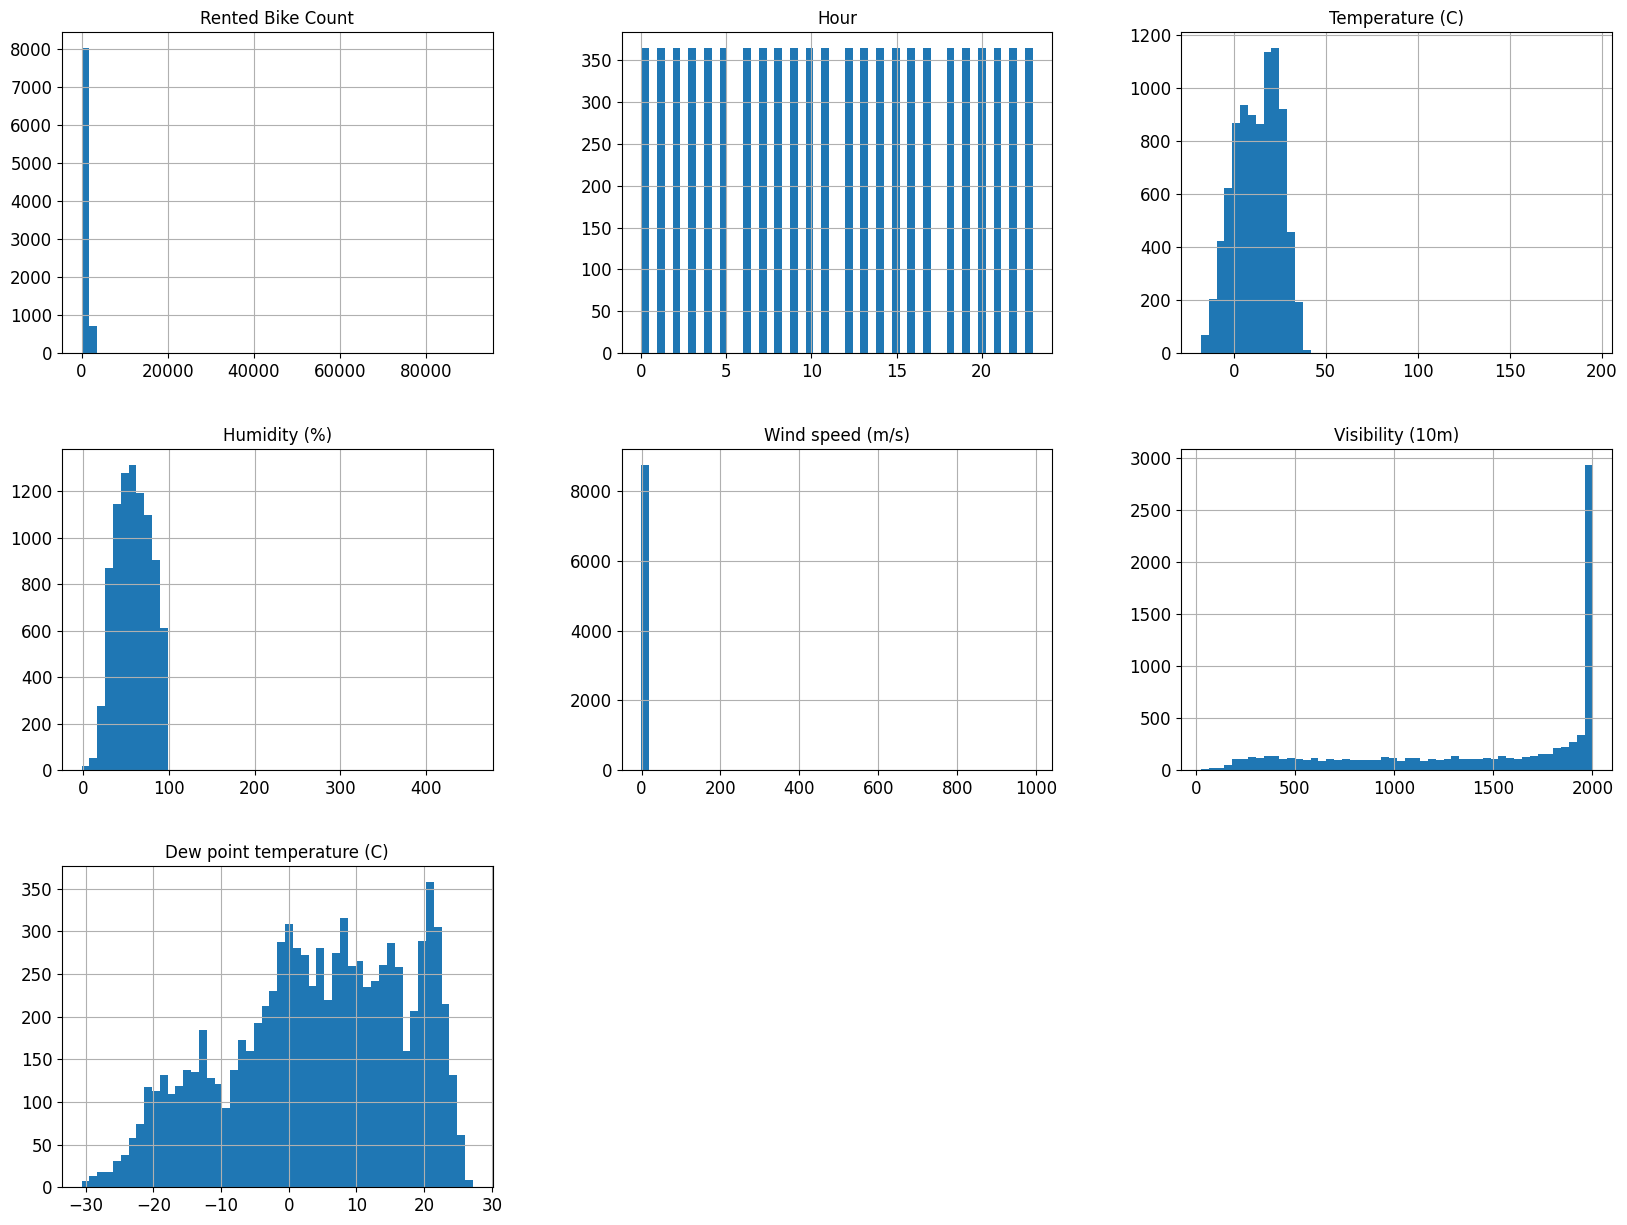

In [4]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Weekday** feature with a binary weekday feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [5]:
## Example code for weekday feature mapping ##

import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

#### 1.2.1 Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.

- Filter out the only "Yes" data in `Functioning Day` column
- Rmove the `Functioning Day` colmun

In [6]:
### Your code here (and remember to upload the resulting csv)

df = df[df["Functioning Day"].apply(lambda x: x == "Yes")]
df.drop(columns=["Functioning Day"], inplace=True)

#### 1.2.2 **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).

- Used `pd.get_dummies` to convert each season to one column and convert it to 1 or 0.

In [7]:
df = pd.get_dummies(df, columns=['Seasons'])
df['Seasons_Autumn'] = df['Seasons_Autumn'].astype(int)
df['Seasons_Spring'] = df['Seasons_Spring'].astype(int)
df['Seasons_Summer'] = df['Seasons_Summer'].astype(int)
df['Seasons_Winter'] = df['Seasons_Winter'].astype(int)

#### 1.2.3 Replace the **Weekday** feature with a binary weekday feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.

- Apply `date_is_weekday` function for `Weekday` column

In [8]:
df["Weekday"] = df["Date"].apply(lambda x: date_is_weekday(x))

#### 1.2.4 **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.

- From `df.info()`, the columns `Date`, `Solar Radiation (MJ/m2)`, `Rainfall(mm)`, `Snowfall (cm)`, and `Holiday` are of type "object".
- `Date` was converted to `pandas.Datetime` format.
- `Holiday` was converted to 1 or 0.
- The functions `string_to_float` and `convert_to_float` were created to convert `Solar Radiation (MJ/m2)`, `Rainfall(mm)`, and `Snowfall (cm)` to floats, replacing any invalid entries with `np.nan`.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   float64
 5   Wind speed (m/s)           8465 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8465 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   object 
 9   Rainfall(mm)               8465 non-null   object 
 10  Snowfall (cm)              8465 non-null   object 
 11  Holiday                    8465 non-null   object 
 12  Seasons_Autumn             8465 non-null   int32  
 13  Seasons_Spring             8465 non-null   int32  
 1

In [10]:
df["Holiday"] = df["Holiday"].apply(lambda x: 1 if x == "Holiday" else 0)
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

In [11]:
def non_numeric_data(column):
    return len([i for i in column if not (isinstance(i, int) or isinstance(i, float) or isinstance(i, pd.Timestamp))])

non_numeric_columns = []
for i in df.columns:
    if non_numeric_data(df[i]) > 0:
        non_numeric_columns.append(i)
        print(i, non_numeric_data(df[i]))

Solar Radiation (MJ/m2) 8465
Rainfall(mm) 8465
Snowfall (cm) 8465


In [12]:
def string_to_float(s):
    try:
        return float(s)
    except:
        return np.nan
    
def convert_to_float(column):
    # return [string_to_float(i) for i in column]
    return pd.to_numeric(column, errors='coerce')

for i in non_numeric_columns:
    df[i] = convert_to_float(df[i])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8465 non-null   datetime64[ns]
 1   Rented Bike Count          8465 non-null   int64         
 2   Hour                       8465 non-null   int64         
 3   Temperature (C)            8465 non-null   float64       
 4   Humidity (%)               8465 non-null   float64       
 5   Wind speed (m/s)           8465 non-null   float64       
 6   Visibility (10m)           8465 non-null   int64         
 7   Dew point temperature (C)  8465 non-null   float64       
 8   Solar Radiation (MJ/m2)    8464 non-null   float64       
 9   Rainfall(mm)               8444 non-null   float64       
 10  Snowfall (cm)              8444 non-null   float64       
 11  Holiday                    8465 non-null   int64         
 12  Seasons_Aut

#### 1.2.5 **Identify and fix any outliers and errors in the data**.

#### Identify outliers

- Using boxplot to identify outliers 

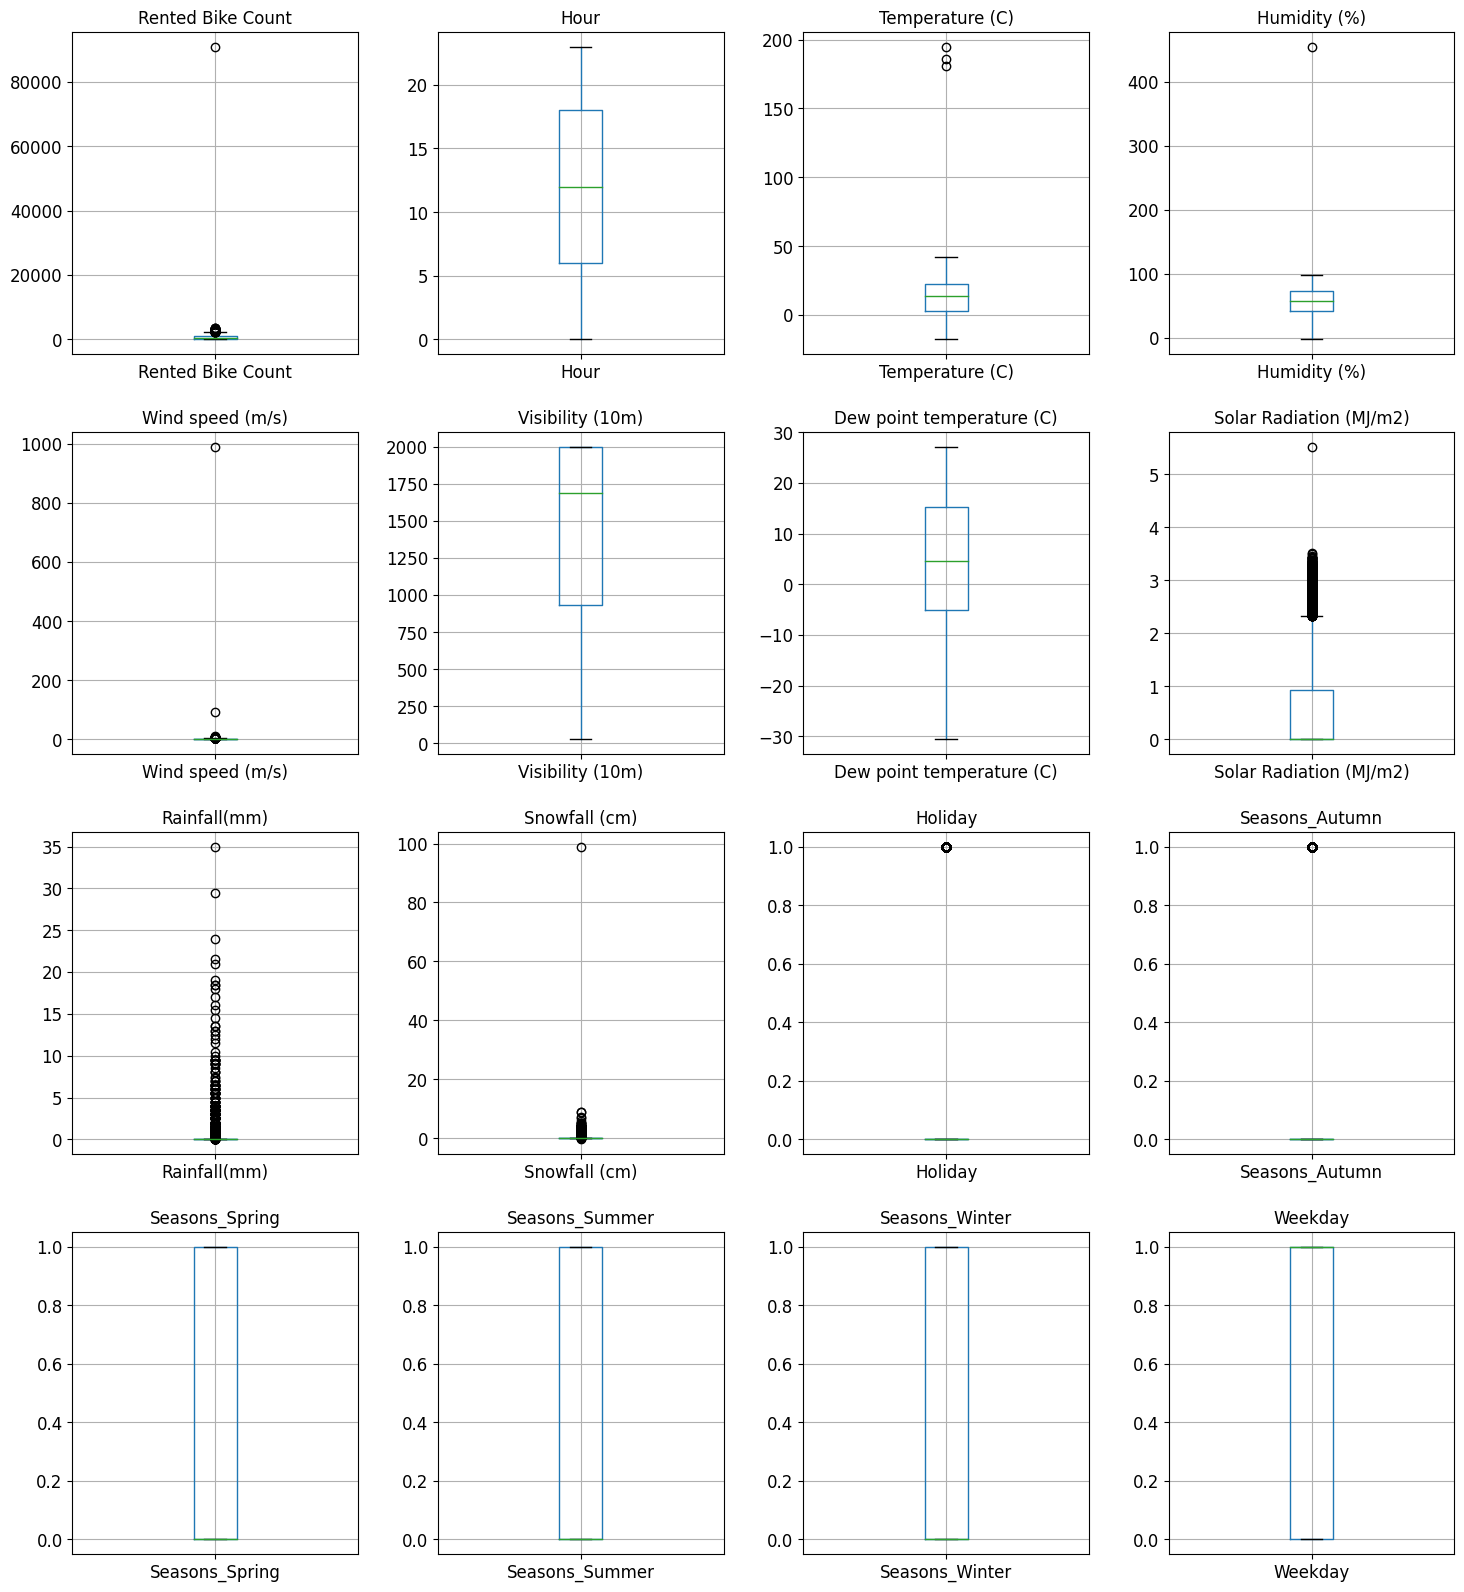

In [14]:
# Plotting boxplots for each column with rotated x-axis labels and more space between rows
plt.figure(figsize=(15, 20))
for i, col in enumerate(df.columns[1:], 1): 
    plt.subplot(5, 4, i)
    df.boxplot(column=col)
    plt.title(col)
    plt.xticks(rotation=0)
    plt.tight_layout(pad=2.0)
plt.show()



#### Identify error value

- Using scatter polt to dentify error value, observe the graph by set up the boundury to filter out

In [15]:
def plot_scatter(df):
    variables = [
        'Rented Bike Count', 'Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)', 'Visibility (10m)', 
        'Dew point temperature (C)', 'Solar Radiation (MJ/m2)', 
        'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 
        'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 
        'Seasons_Winter', 'Weekday'
    ]

    # Plotting
    fig, axs = plt.subplots(5, 3, figsize=(15, 20))
    fig.suptitle('Scatter Plots of Hour Against Various Variables')

    for ax, variable in zip(axs.flat, variables):
        if df[variable].dtype == 'object':  # Convert categorical data to numerical for plotting
            df[variable] = pd.factorize(df[variable])[0]
        ax.scatter(df[variable], df['Hour'])
        ax.set_title(f'Hour vs {variable}')
        ax.set_xlabel(variable)
        ax.set_ylabel('Hour')
        ax.grid(True)

    # Hide the last subplot if there are fewer variables
    for i in range(len(variables), len(axs.flat)):
        fig.delaxes(axs.flat[i])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

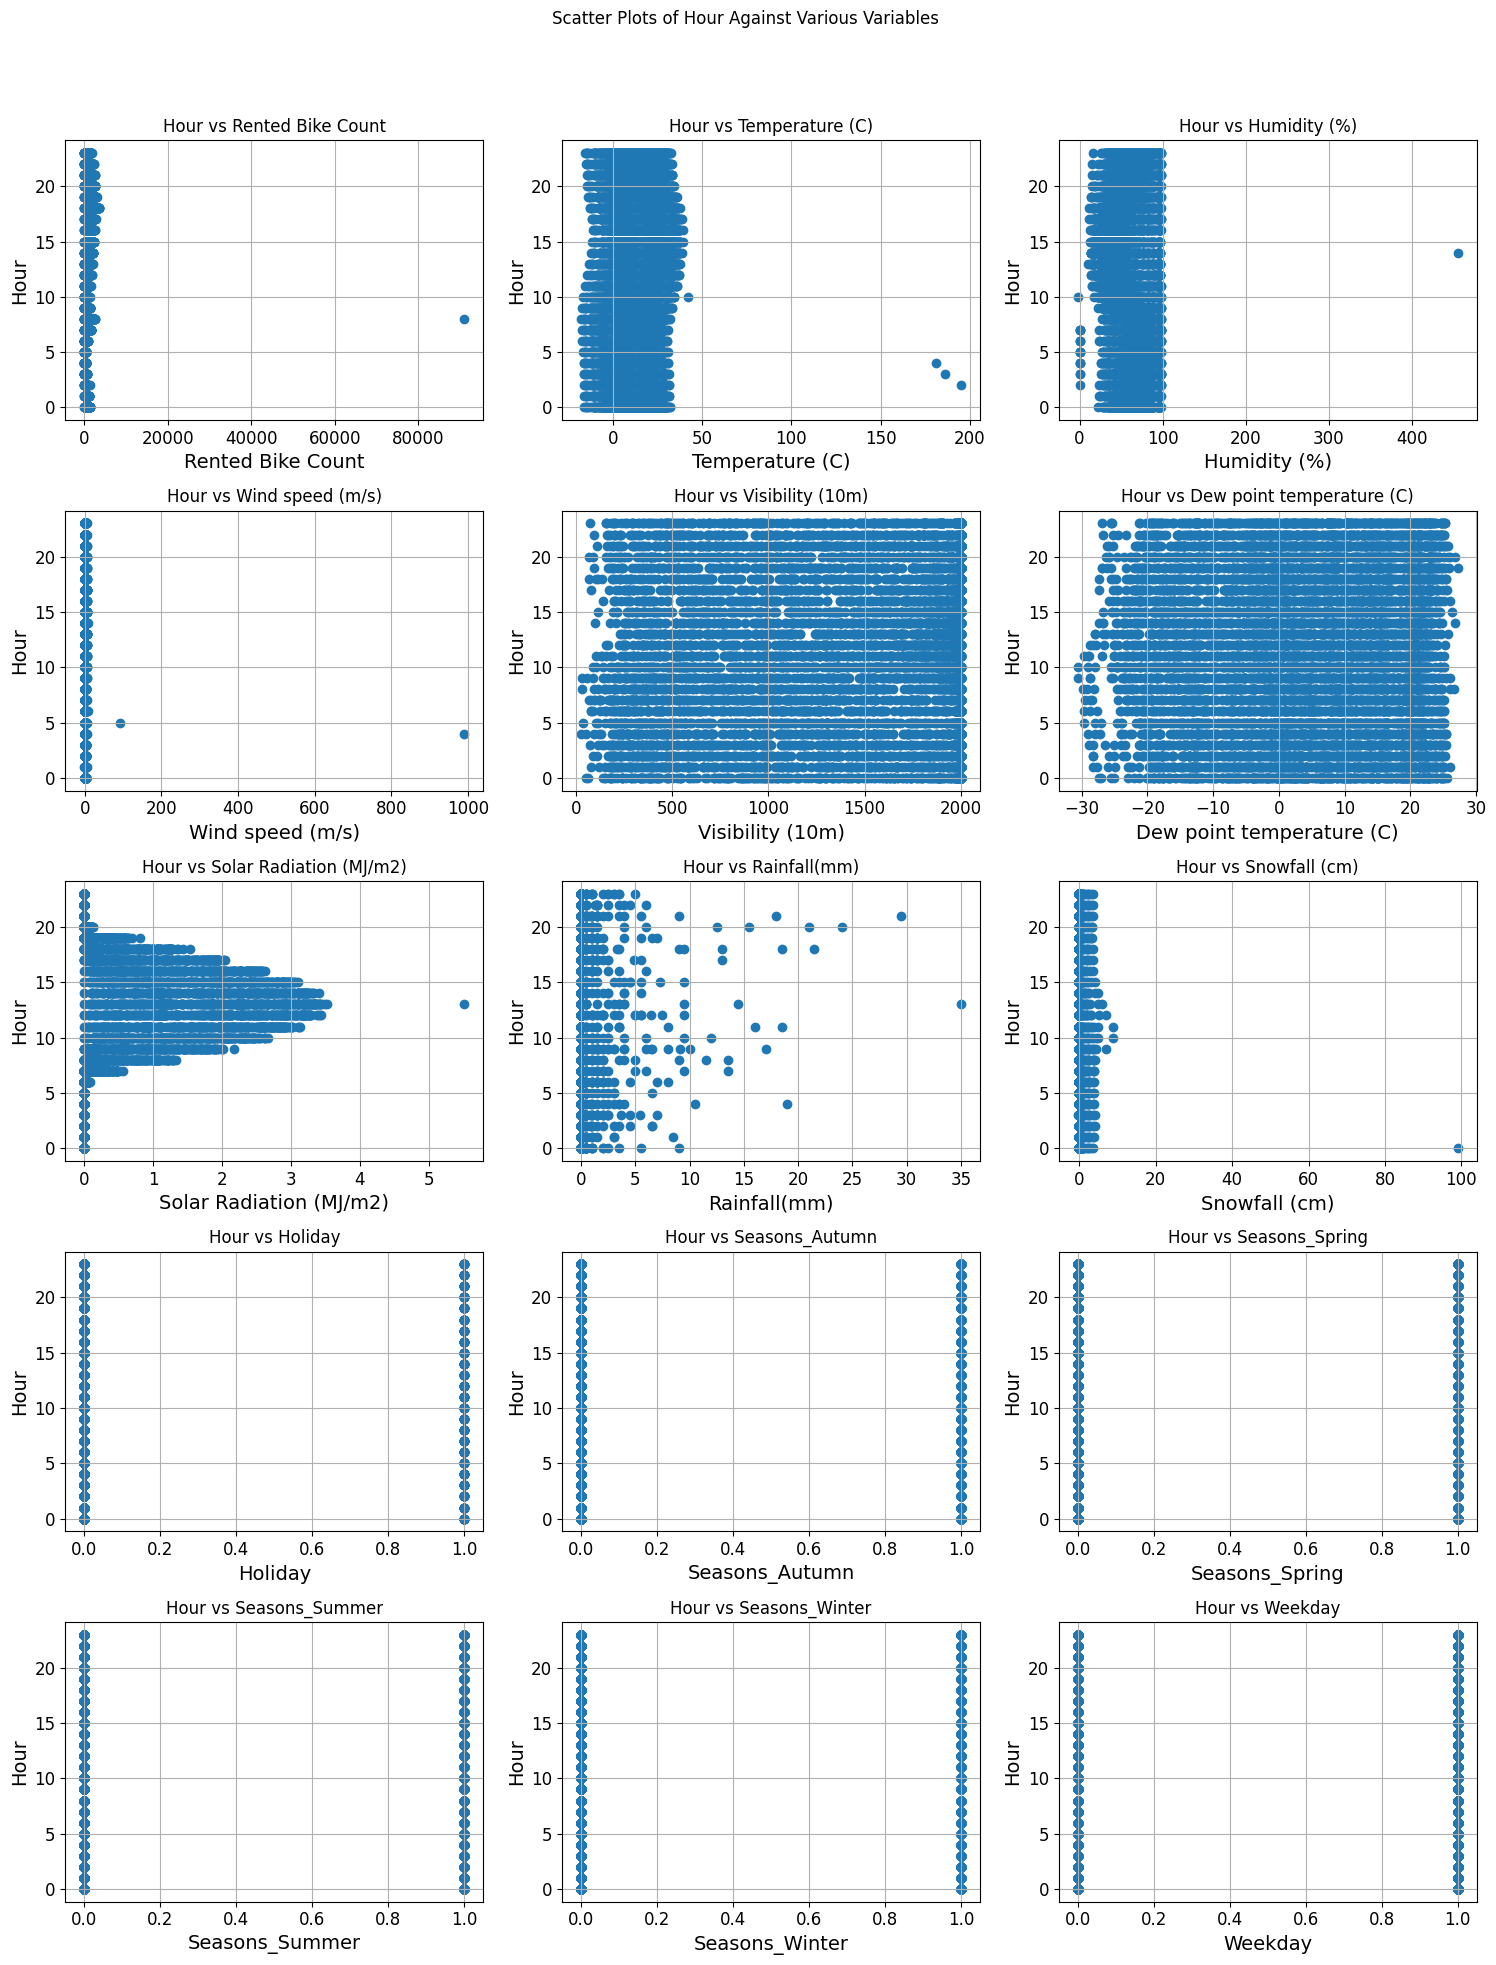

In [16]:
plot_scatter(df)

`impute_outliers_with_nan` is a function using IQR to identify outliers and replace it as `np.nan`

In [17]:
def impute_outliers_with_nan(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = (column < lower_bound) | (column > upper_bound) | column.isna()

    column = column.copy()
    column.loc[mask] = np.nan  # Impute with np.nan instead of median

    return column


df['Solar Radiation (MJ/m2)'] = impute_outliers_with_nan(df['Solar Radiation (MJ/m2)'])
df.loc[df['Rented Bike Count'] > 80000, 'Rented Bike Count'] = np.nan
df.loc[df['Temperature (C)'] > 40, 'Temperature (C)'] = np.nan
df.loc[(df['Humidity (%)'] <= 0) | (df['Humidity (%)'] > 100), 'Humidity (%)'] = np.nan
df.loc[(df['Wind speed (m/s)'] < 0) | (df['Wind speed (m/s)'] > 80), 'Wind speed (m/s)'] = np.nan
df.loc[df['Snowfall (cm)'] > 60, 'Snowfall (cm)'] = np.nan


#### Summary of Fixing Outliers and Errors
- Since imputation and normalization will proceed in step 2, `np.nan` will be used as a placeholder for further processing.
- The columns `Solar Radiation (MJ/m2)`, `Rented Bike Count`, `Temperature (C)`, `Humidity (%)`, `Wind speed (m/s)`, and `Snowfall (cm)` were chosen to be fixed.
- `Solar Radiation (MJ/m2)` has continuous outlier values; therefore, the IQR method will be used to remove outliers and replace them with `np.nan`.
- The rest of the features will use the boundaries observed in the scatter plot. If a value is outside the range, it will be replaced with `np.nan`.


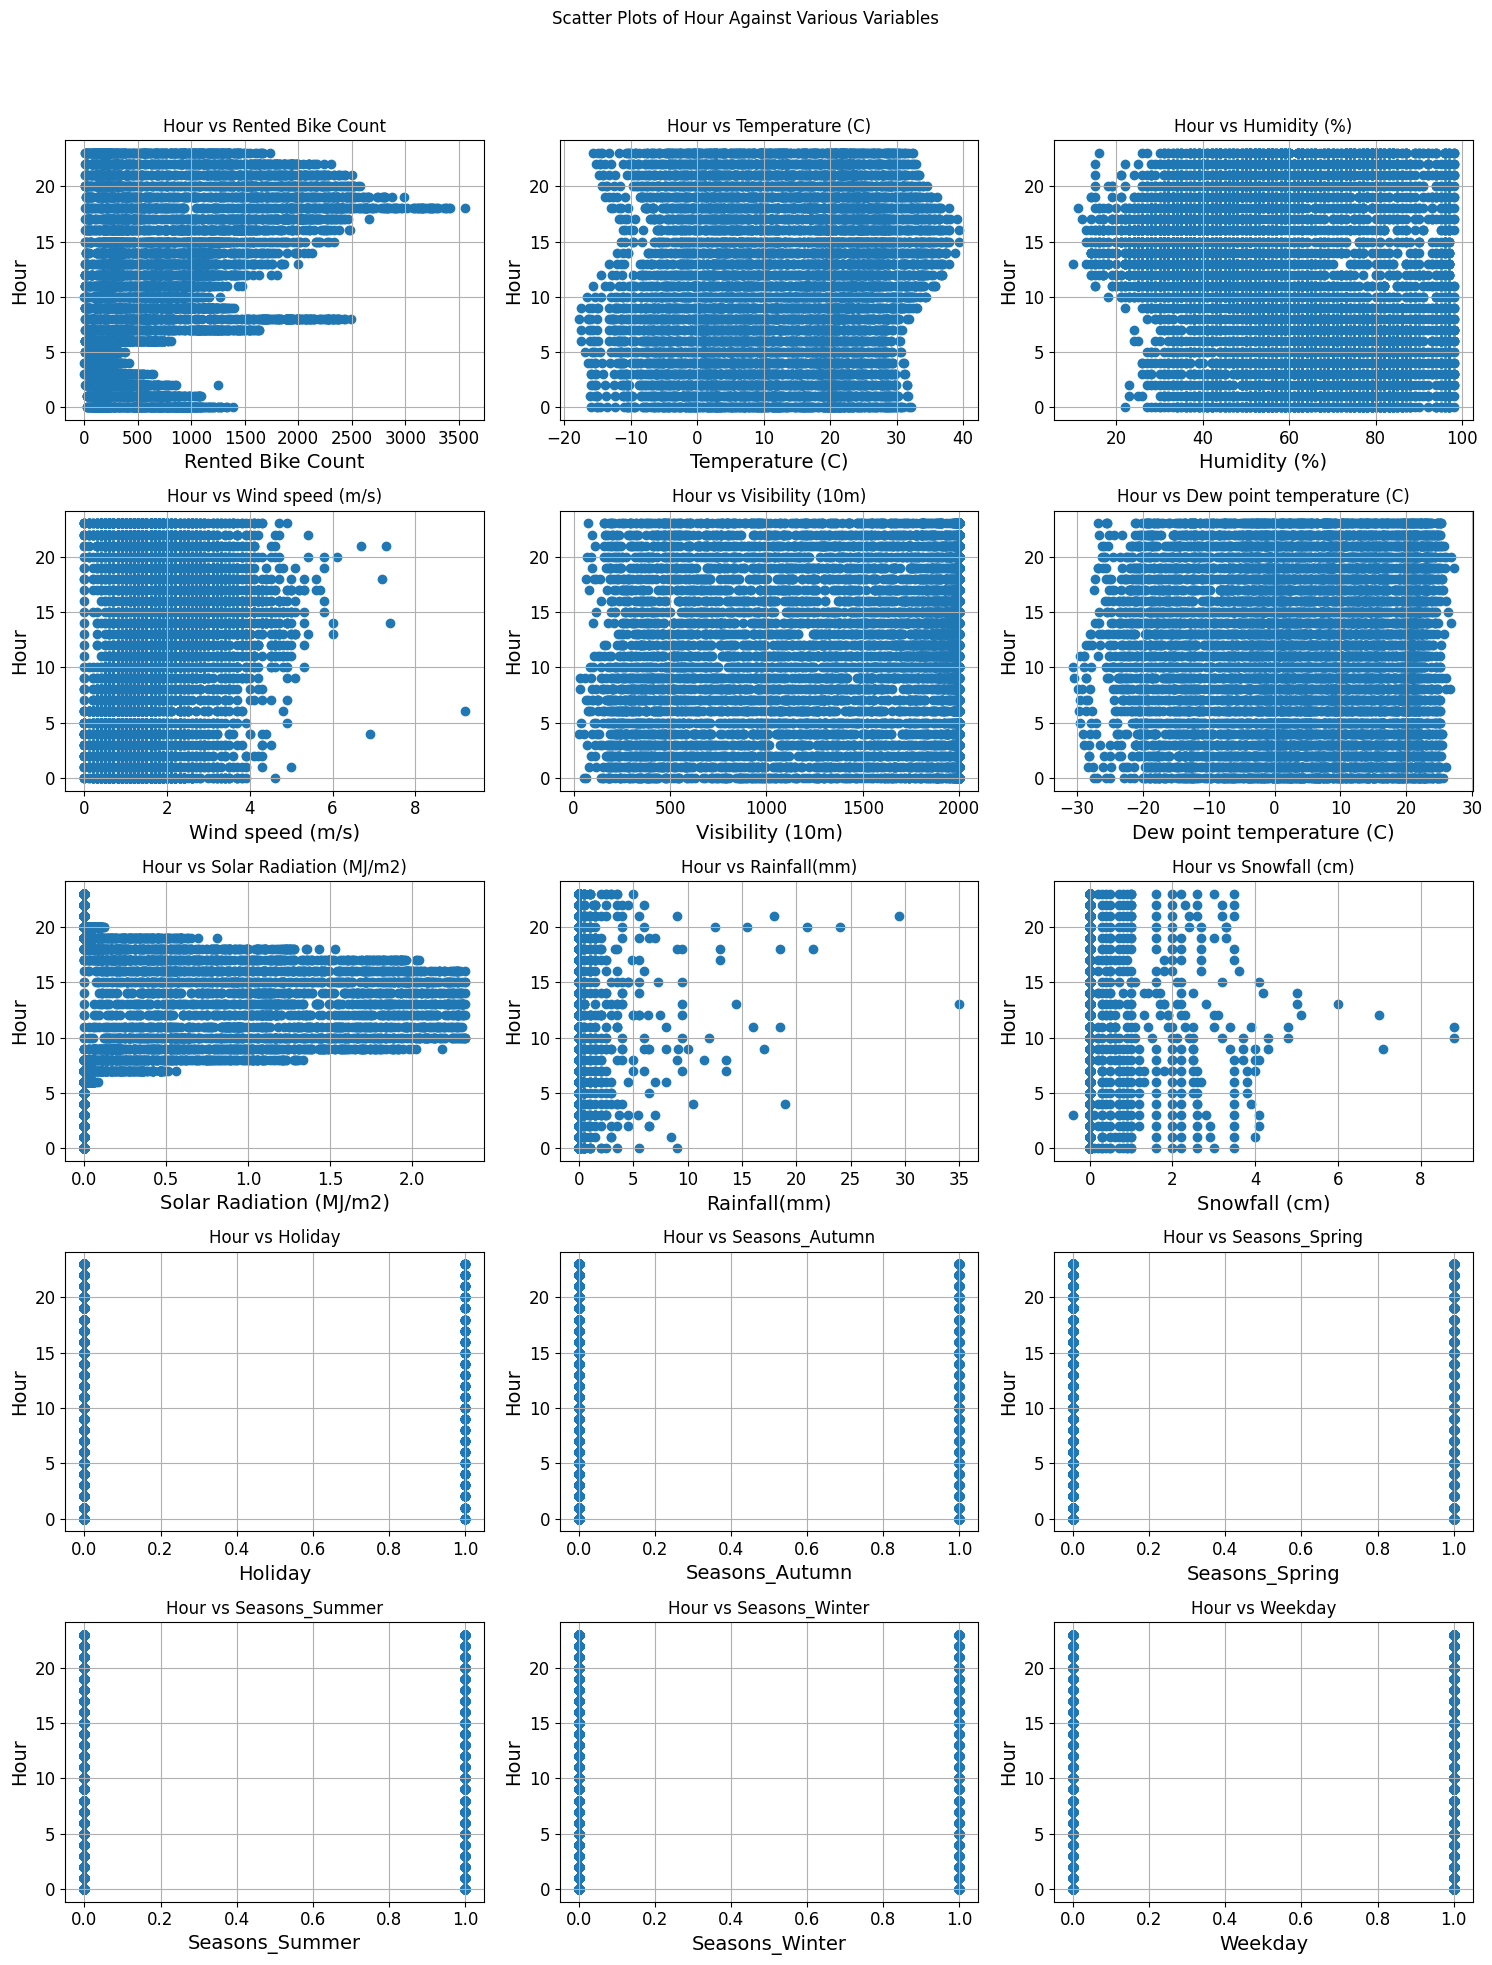

In [18]:
plot_scatter(df)

#### 1.2.6 Save the data as "CleanedSeoulBikeData.csv.csv"

In [19]:
df.to_csv("CleanedSeoulBikeData.csv.csv", index=False)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

- Create `Pipeline` for data preprocessing
- Using `SimpleImputer` to impute `np.nan` as its median value
- Using `StandardScaler` for data normalization 

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())              
])


### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

- From the output of `df.isna().sum()`, check for any `na` values in the data.
- Since `Rented Bike Count` is the `y` for the model, the `np.nan` values will be dropped.
- The rest of the features will be preprocessed using a `Pipeline`.
- To prevent data leakage, split the data 80:20 before preprocessing.
- Apply the same pipeline to both `X_train` and `X_test`, using `fit_transform` for `X_train` and `transform` for `X_test`.

In [21]:
print(df.isna().sum())

Date                           0
Rented Bike Count              1
Hour                           0
Temperature (C)                4
Humidity (%)                  19
Wind speed (m/s)               3
Visibility (10m)               0
Dew point temperature (C)      0
Solar Radiation (MJ/m2)      620
Rainfall(mm)                  21
Snowfall (cm)                 22
Holiday                        0
Seasons_Autumn                 0
Seasons_Spring                 0
Seasons_Summer                 0
Seasons_Winter                 0
Weekday                        0
dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = df.dropna(subset=['Rented Bike Count'])
X = df.drop(['Rented Bike Count', "Date"], axis=1)
y = df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

baseline_pl = Pipeline([
    ('preproc', pipeline), 
    ('baseline', LinearRegression()) 
])

baseline_pl.fit(X_train, y_train)

predictions = baseline_pl.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Training RMSE: {train_rmse}")

baseline_predictions = np.full_like(y_train, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_train, baseline_predictions))
print(f"Baseline RMSE: {baseline_rmse}")


Training RMSE: 431.4446605901333
Baseline RMSE: 645.9881892184436


### 3. Hyper-parameter optimisation 




Baseline RMSE Results:
                      Mean RMSE      Std RMSE
Linear Regression -1.078557e+14  3.235672e+14
SVR               -4.926394e+02  2.692560e+02

Optimized RMSE Results:
                      Mean RMSE      Std RMSE
Linear Regression -1.078557e+14  3.235672e+14
SVR               -3.225058e+02  1.509872e+02


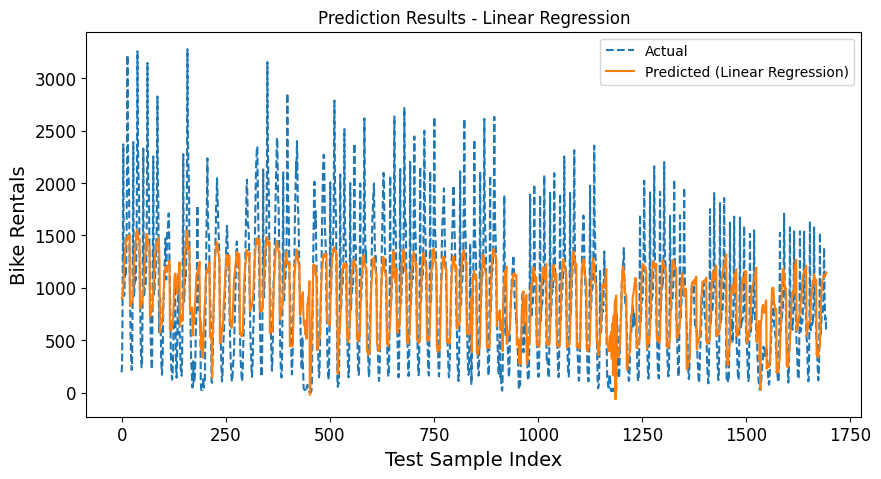

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Load and preprocess the dataset
df = df.dropna(subset=['Rented Bike Count'])  # Ensure no missing target values
X = df.drop(['Rented Bike Count', "Date"], axis=1)
y = df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Define preprocessing pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR()
}

# Perform 10-fold cross-validation for each model (baseline)
baseline_results = {}
for name, model in models.items():
    full_pipeline = Pipeline([('preproc', pipeline), ('model', model)])
    scores = cross_val_score(full_pipeline, X_train, y_train, scoring=rmse_scorer, cv=10)
    baseline_results[name] = (np.mean(scores), np.std(scores))

# Display baseline results
baseline_df = pd.DataFrame(baseline_results, index=["Mean RMSE", "Std RMSE"]).T
print("\nBaseline RMSE Results:")
print(baseline_df)

# Hyperparameter tuning using GridSearch
param_grid = {
    "Linear Regression": {},  # No hyperparameters to tune for simple Linear Regression
    "SVR": {
        'model__C': [0.1, 1, 10, 100],
        'model__epsilon': [0.01, 0.1, 1],
        'model__kernel': ['linear', 'rbf']
    }
}

optimized_results = {}
best_models = {}

for name, model in models.items():
    full_pipeline = Pipeline([('preproc', pipeline), ('model', model)])
    grid_search = GridSearchCV(full_pipeline, param_grid[name], scoring=rmse_scorer, cv=10, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, scoring=rmse_scorer, cv=10)
    optimized_results[name] = (np.mean(scores), np.std(scores))

# Display optimized results
optimized_df = pd.DataFrame(optimized_results, index=["Mean RMSE", "Std RMSE"]).T
print("\nOptimized RMSE Results:")
print(optimized_df)

# Choose the best model (lowest mean RMSE after optimization)
best_model_name = min(optimized_results, key=lambda k: optimized_results[k][0])
best_model = best_models[best_model_name]

# Fit the best model and visualize results
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

# Plot predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", linestyle="dashed")
plt.plot(predictions, label=f"Predicted ({best_model_name})")
plt.xlabel("Test Sample Index")
plt.ylabel("Bike Rentals")
plt.legend()
plt.title(f"Prediction Results - {best_model_name}")
plt.show()
